# Defining Gas Outflow (Galactic)

Prepared by: Benoit Côté (bcote@uvic.ca)

This notebook shows how to control and define the galactic outflow rate in <a href="http://adsabs.harvard.edu/abs/2017arXiv171006442C">OMEGA+</a>.  It represents the mass transfer from the central galaxy (which is modeled with <a href="http://adsabs.harvard.edu/abs/2017ApJ...835..128C">OMEGA</a>) into the circumgalactic medium (gas reservoir surrounding the galaxy).

The galactic outflow rate $\dot{M}_\mathrm{out}$ is tied to the star formation rate $\dot{M}_\star$ of the galaxy via the mass-loading factor $\eta$ (e.g., <a href="http://adsabs.harvard.edu/abs/2005ApJ...618..569M">Murray et al. 2005</a>)

$$ \eta \equiv \frac{\dot{M}_\mathrm{out}}{\dot{M}_\star} $$

#### Different mass-loading options

- `1:` Constant mass-loading factor
- `2:` Mass-dependent mass-loading (see <a href="http://adsabs.harvard.edu/abs/2017ApJ...835..128C">Côté et al. 2017</a>)
- `3:` Mass- and redshift-dependent mass-loading (see <a href="http://adsabs.harvard.edu/abs/2017ApJ...835..128C">Côté et al. 2017</a>)

In [1]:
# Import python modules
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Import the OMEGA+ and OMEGA modules
from JINAPyCEE import omega_plus
from NuPyCEE import omega

## 1. Constant Mass-Loading Factor

The first option is to assume a constant mass-loading factor, which means the outflow rate will be directly proportional to the star formation rate.

In [2]:
# Define the initial mass of gas in the galaxy [Msun]
mgal = 1.0

# Define the dark matter halo mass [Msun]
# This will set the gas mass in the circumgalactic medium
m_DM_0 = 1.0e10

# Set the star formation efficiency
sfe = 0.01

# Number of timesteps (see also timestep management link above)
special_timesteps = 90

# Set the common arguments for the upcoming OMEGA+ runs
kwargs_1 = {"mgal":mgal, "special_timesteps":special_timesteps,
            "m_DM_0":m_DM_0, "sfe":sfe, "t_inflow":2.0e9}

In [3]:
# Run OMEGA+ with no outflow
op1_ml_0  = omega_plus.omega_plus(mass_loading=0.0,  **kwargs_1)

# Run OMEGA+ with moderate outflow
op1_ml_1  = omega_plus.omega_plus(mass_loading=1.0,  **kwargs_1)

# Run OMEGA+ with strong outflow
op1_ml_10 = omega_plus.omega_plus(mass_loading=10.0, **kwargs_1)

OMEGA+ run in progress..
OMEGA run in progress..
   OMEGA run completed - Run time: 1.35s
   OMEGA+ run completed - Run time: 1.36s
OMEGA+ run in progress..
OMEGA run in progress..
   OMEGA run completed - Run time: 1.35s
   OMEGA+ run completed - Run time: 1.35s
OMEGA+ run in progress..
OMEGA run in progress..
   OMEGA run completed - Run time: 1.4s
   OMEGA+ run completed - Run time: 1.4s


<IPython.core.display.Javascript object>


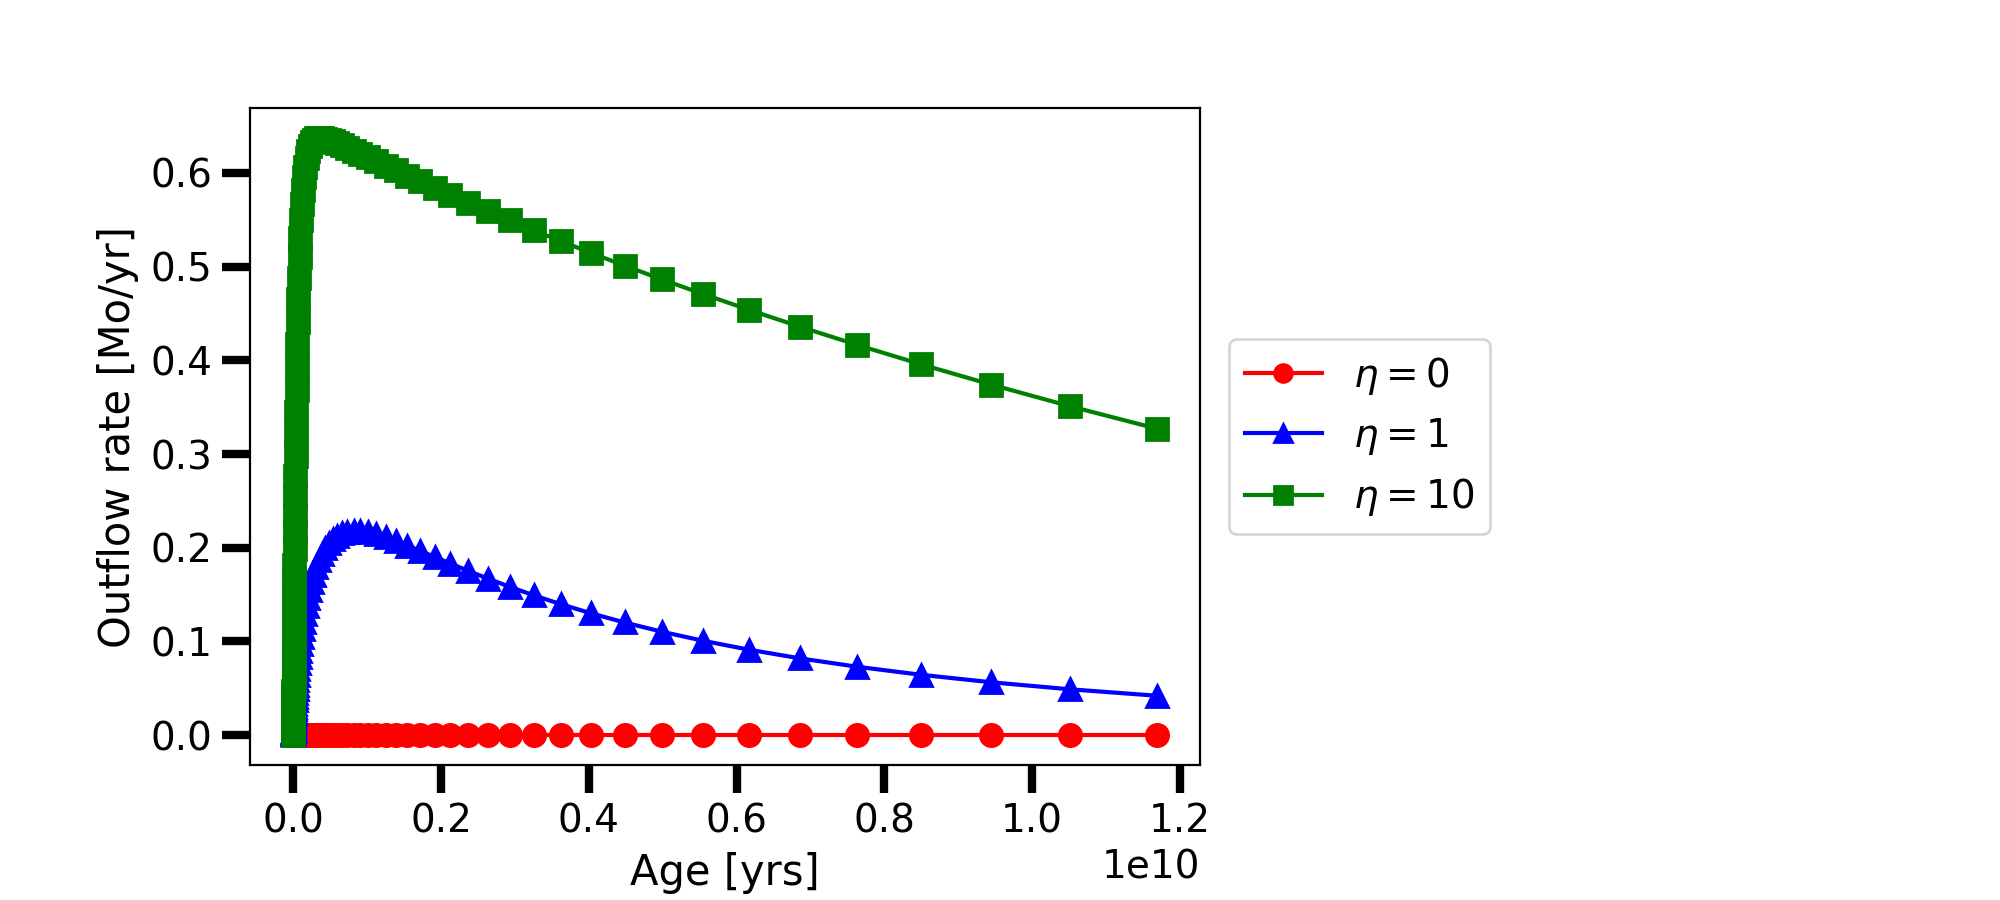

In [5]:
# Plot the outflow history
# Note: the OMEGA instance is the "inner"
%matplotlib nbagg
op1_ml_0.inner.plot_outflow_rate( color='r', marker="o", label='$\eta=0$')
op1_ml_1.inner.plot_outflow_rate( color='b', marker="^", label='$\eta=1$')
op1_ml_10.inner.plot_outflow_rate(color='g', marker="s", label='$\eta=10$')

<IPython.core.display.Javascript object>


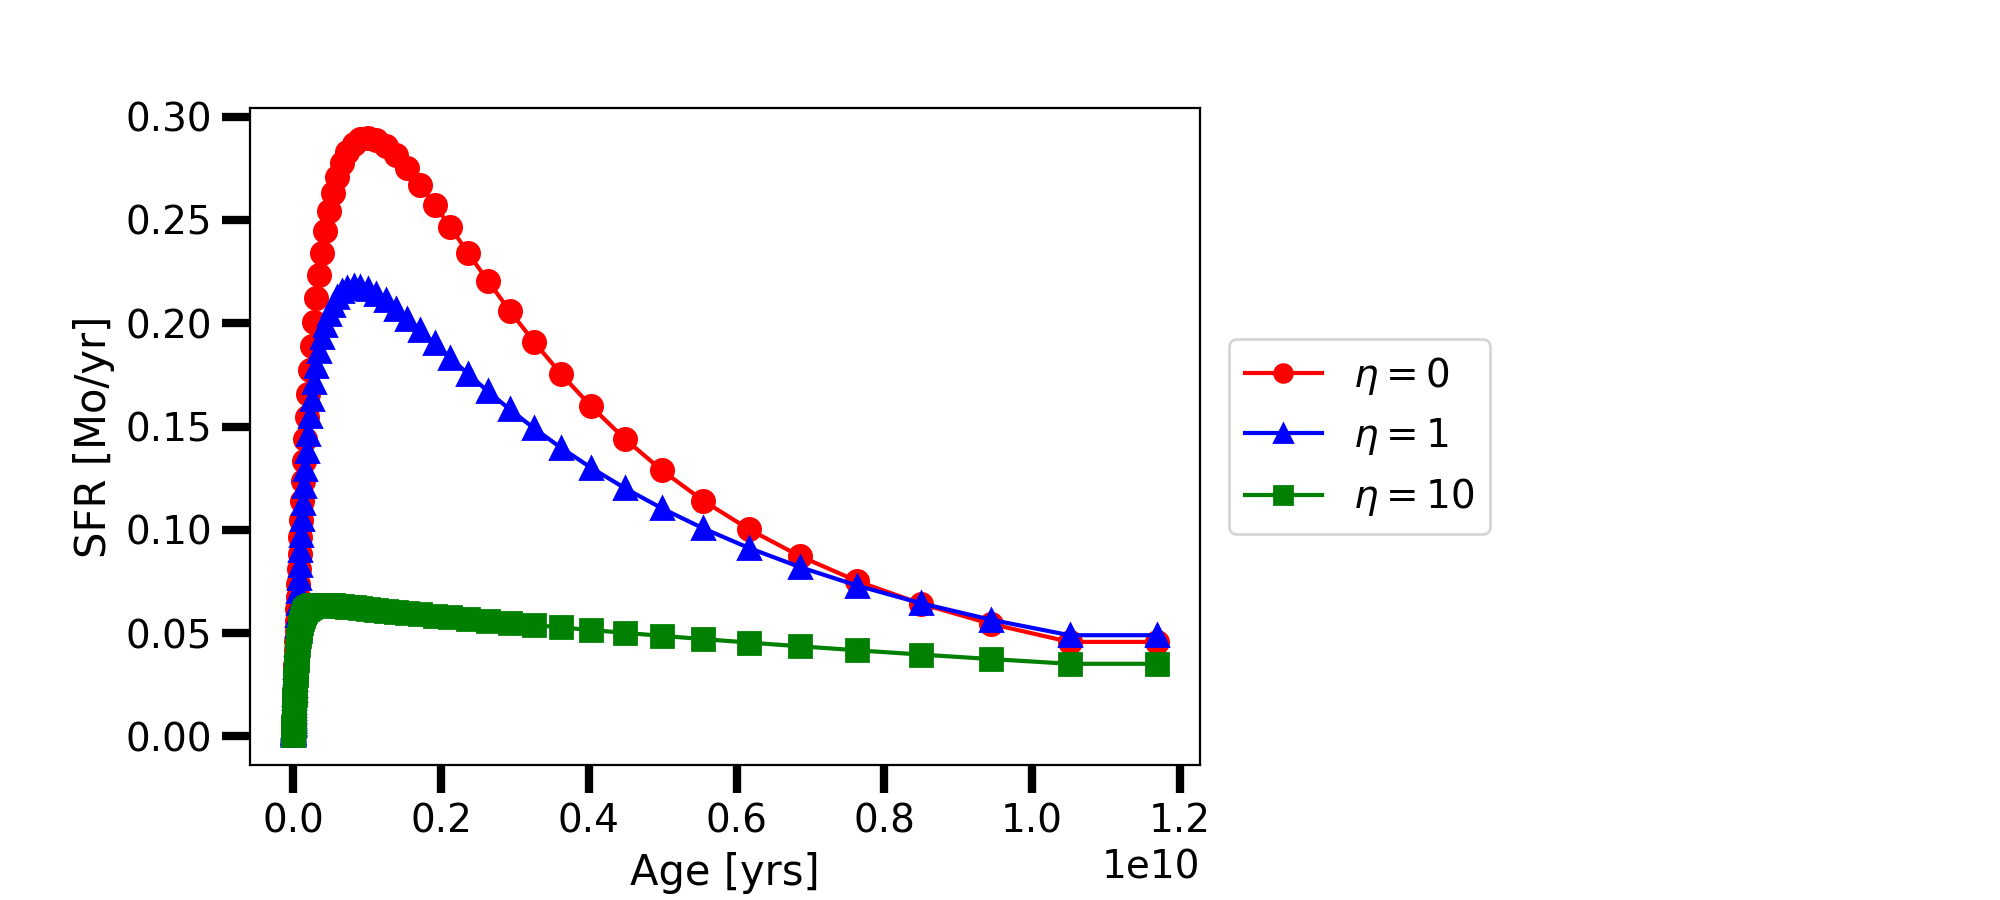

In [6]:
# Plot the star formation history
%matplotlib nbagg
op1_ml_0.inner.plot_star_formation_rate( color='r', marker="o", label='$\eta=0$')
op1_ml_1.inner.plot_star_formation_rate( color='b', marker="^", label='$\eta=1$')
op1_ml_10.inner.plot_star_formation_rate(color='g', marker="s", label='$\eta=10$')

## 2. Mass-Dependent Mass-Loading Factor

This option relates the mass-loading factor to the mass $M_\mathrm{DM}$ of the dark matter halo surrounding the galaxy, which can vary as a function of time.

$$ \eta(t) = \eta_0M_\mathrm{DM}(t)^{-\gamma/3} $$

- $\eta_0$: Normalization constant. It represents the value of $\eta$ at the end of the simulation.
- $\gamma$: Mass-loading power-law index used to control the correlation between the outflows and $M_\mathrm{DM}$ (see <a href="http://adsabs.harvard.edu/abs/2017ApJ...835..128C">Côté et al. 2017</a> for more details). An example of how to vary this parameter is shown in Section 3.

In [7]:
# Run an OMEGA model to access the evolution of the dark matter halo mass
o_for_m_DM = omega.omega(m_DM_0=m_DM_0, DM_evolution=True)

OMEGA run in progress..
..Time refinement..
   OMEGA run completed - Run time: 0.92s


In [8]:
# Convert the evolution of the dark matter mass into an input array
# The timestepping of this input array does not need the same as OMEGA+
# DM_array[ time ][ mass]
DM_array = [None] * (o_for_m_DM.nb_timesteps+1)
for i_t in range(o_for_m_DM.nb_timesteps+1):
    DM_array[i_t] = [o_for_m_DM.history.age[i_t], o_for_m_DM.m_DM_t[i_t]]
    
# Set the common arguments for the upcoming OMEGA+ runs
# Note that the inflow prescription is different from Secion 1
kwargs_2 = {"mgal":mgal, "special_timesteps":special_timesteps*2,
            "m_DM_0":m_DM_0, "sfe":sfe, "f_t_ff":2.0,
            "DM_outflow_C17":True, "DM_array":DM_array,
            "C17_eta_z_dep":False}

In [9]:
# Activate the mass-dependent mass-loading factor option
# DM_outflow_C17 = True
# C17_eta_z_dep = False

# Run OMEGA+ with different mass-loading factor normalizations.
# The "exp_ml" is the gamma exponent in the equation above.
op2_eta_0  = omega_plus.omega_plus(mass_loading=0.0, exp_ml=1.0, **kwargs_2)
op2_eta_1  = omega_plus.omega_plus(mass_loading=1.0, exp_ml=1.0, **kwargs_2)
op2_eta_10 = omega_plus.omega_plus(mass_loading=10.0,exp_ml=1.0, **kwargs_2)

OMEGA+ run in progress..
OMEGA run in progress..
   OMEGA run completed - Run time: 2.65s
   OMEGA+ run completed - Run time: 2.65s
OMEGA+ run in progress..
OMEGA run in progress..
   OMEGA run completed - Run time: 2.62s
   OMEGA+ run completed - Run time: 2.62s
OMEGA+ run in progress..
OMEGA run in progress..
   OMEGA run completed - Run time: 2.69s
   OMEGA+ run completed - Run time: 2.69s


<IPython.core.display.Javascript object>


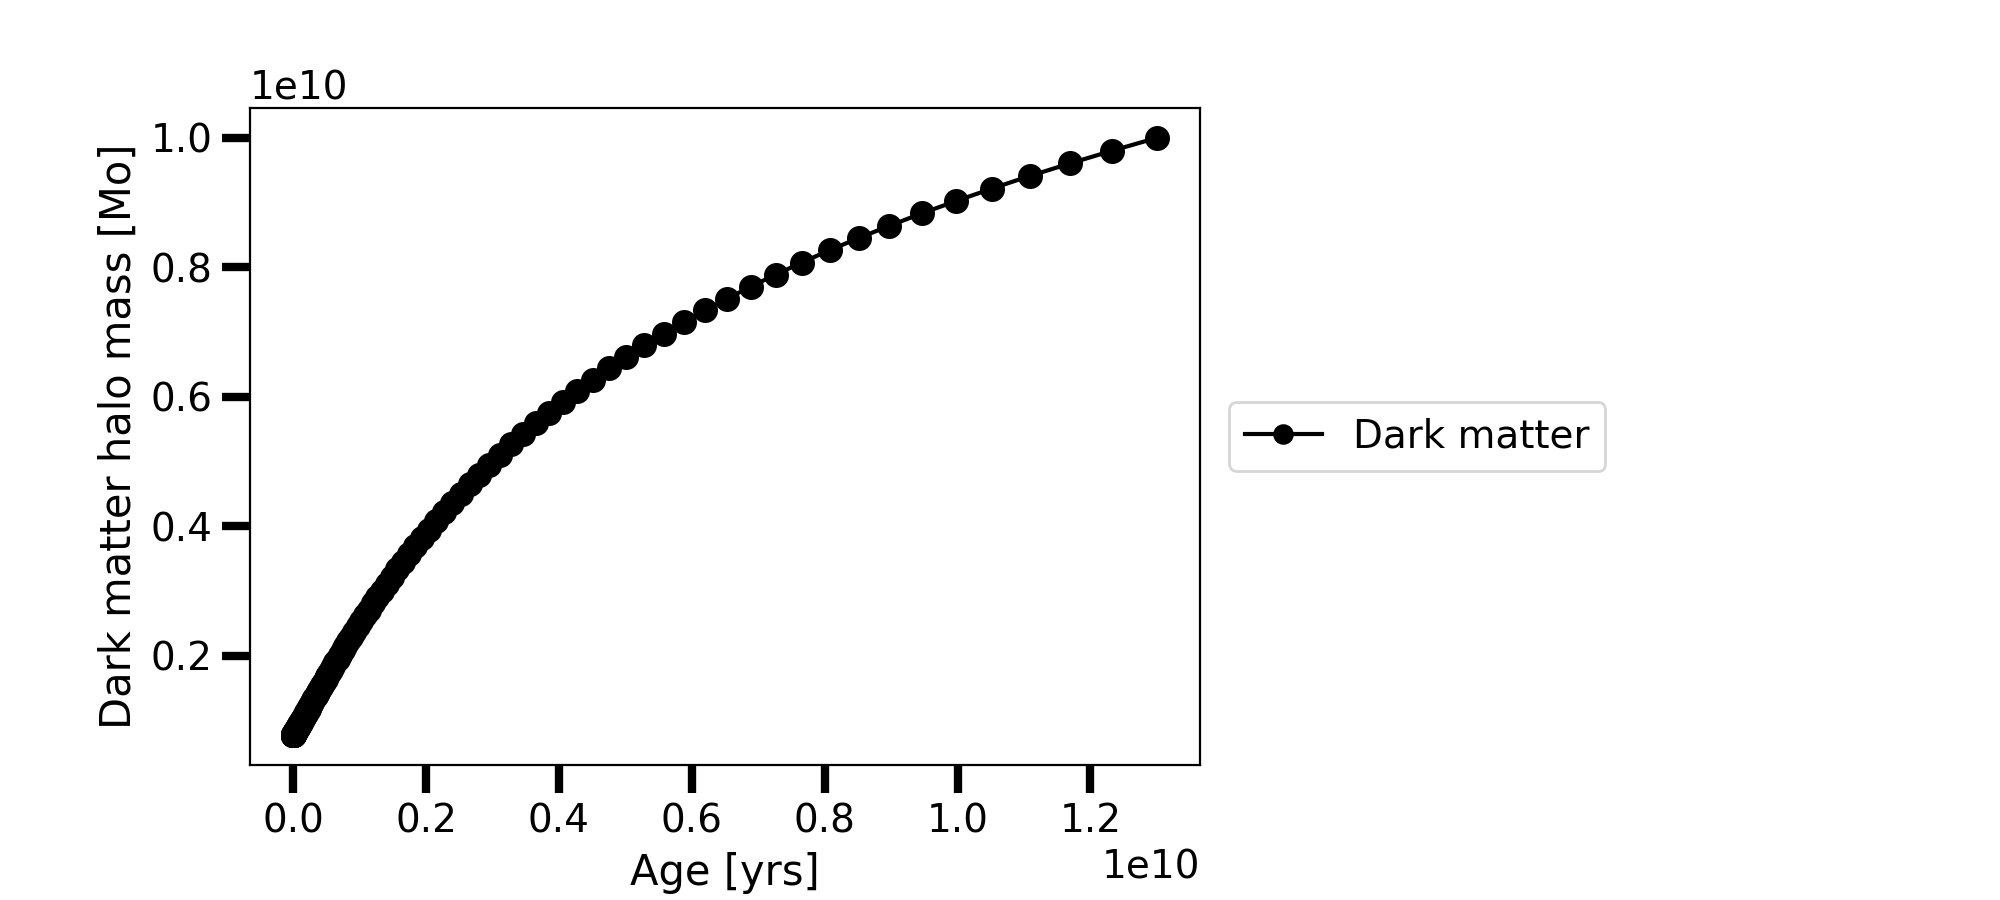

In [10]:
# Plot the evolution of the dark matter halo mass
%matplotlib nbagg
op2_eta_0.inner.plot_dark_matter()

<IPython.core.display.Javascript object>


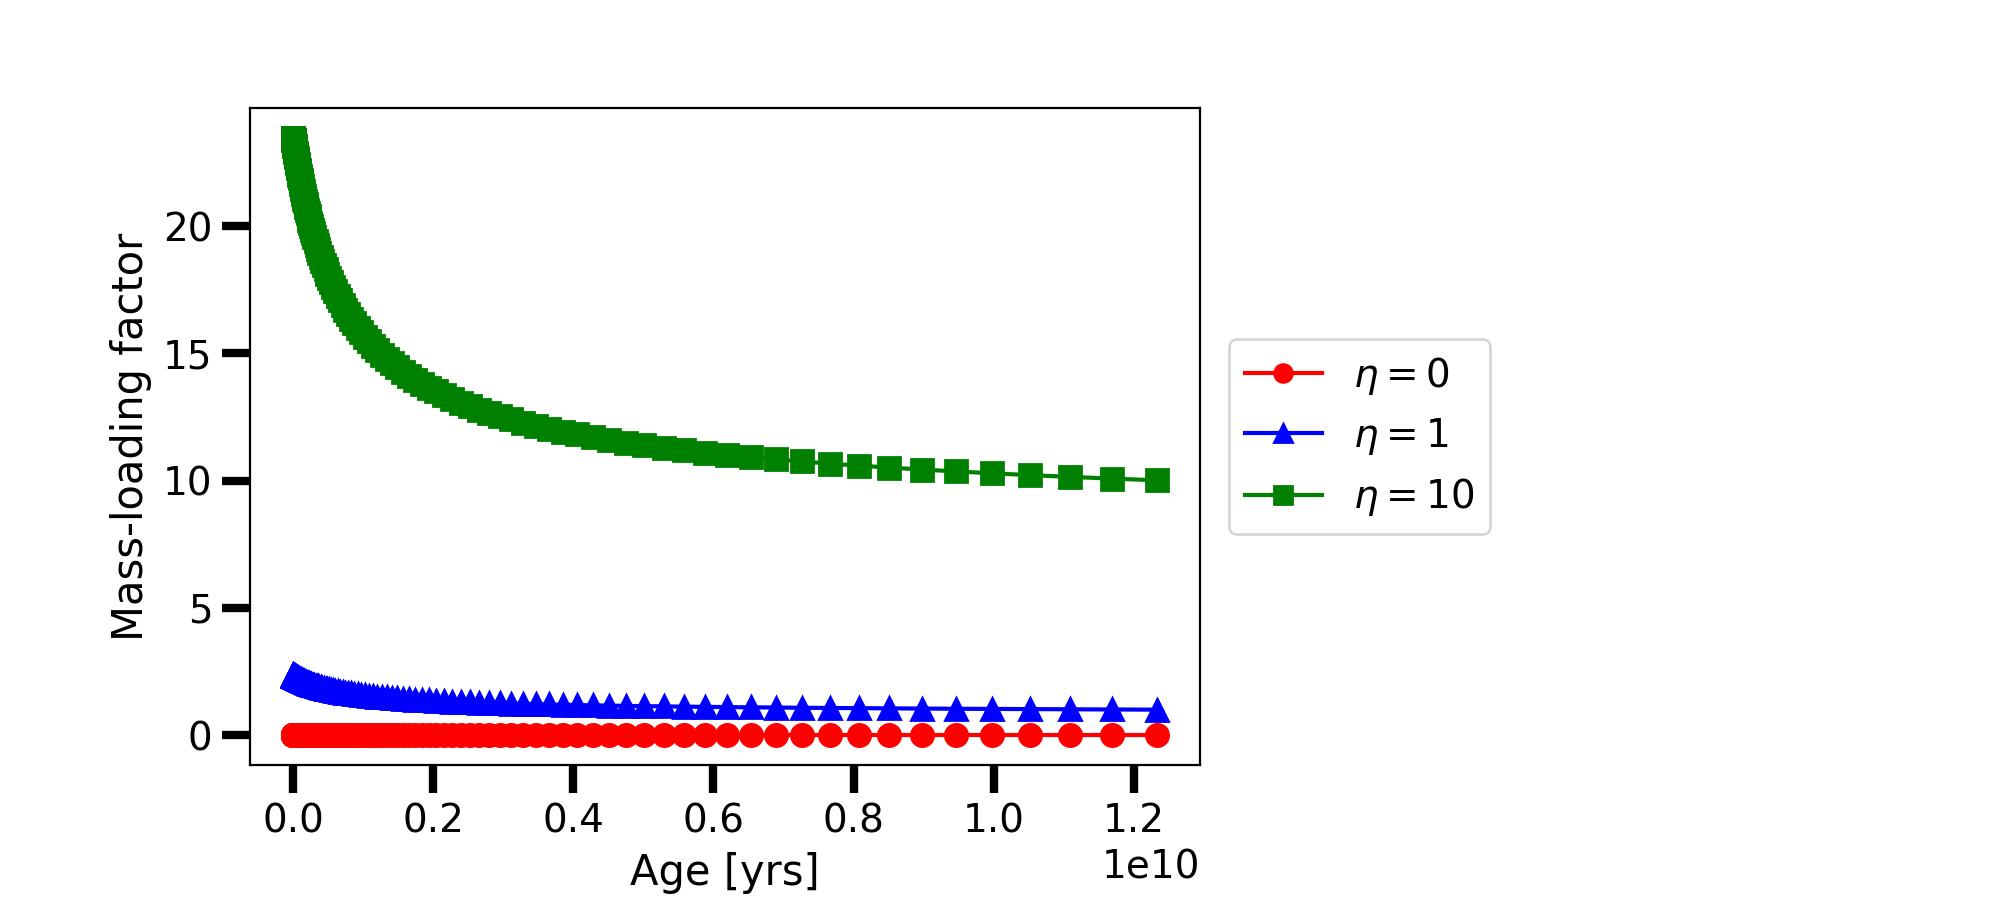

In [11]:
# Plot the mass-loading factor
%matplotlib nbagg
op2_eta_0.inner.plot_mass_loading( color='r', marker="o", label='$\eta=0$')
op2_eta_1.inner.plot_mass_loading( color='b', marker="^", label='$\eta=1$')
op2_eta_10.inner.plot_mass_loading(color='g', marker="s", label='$\eta=10$')

<IPython.core.display.Javascript object>


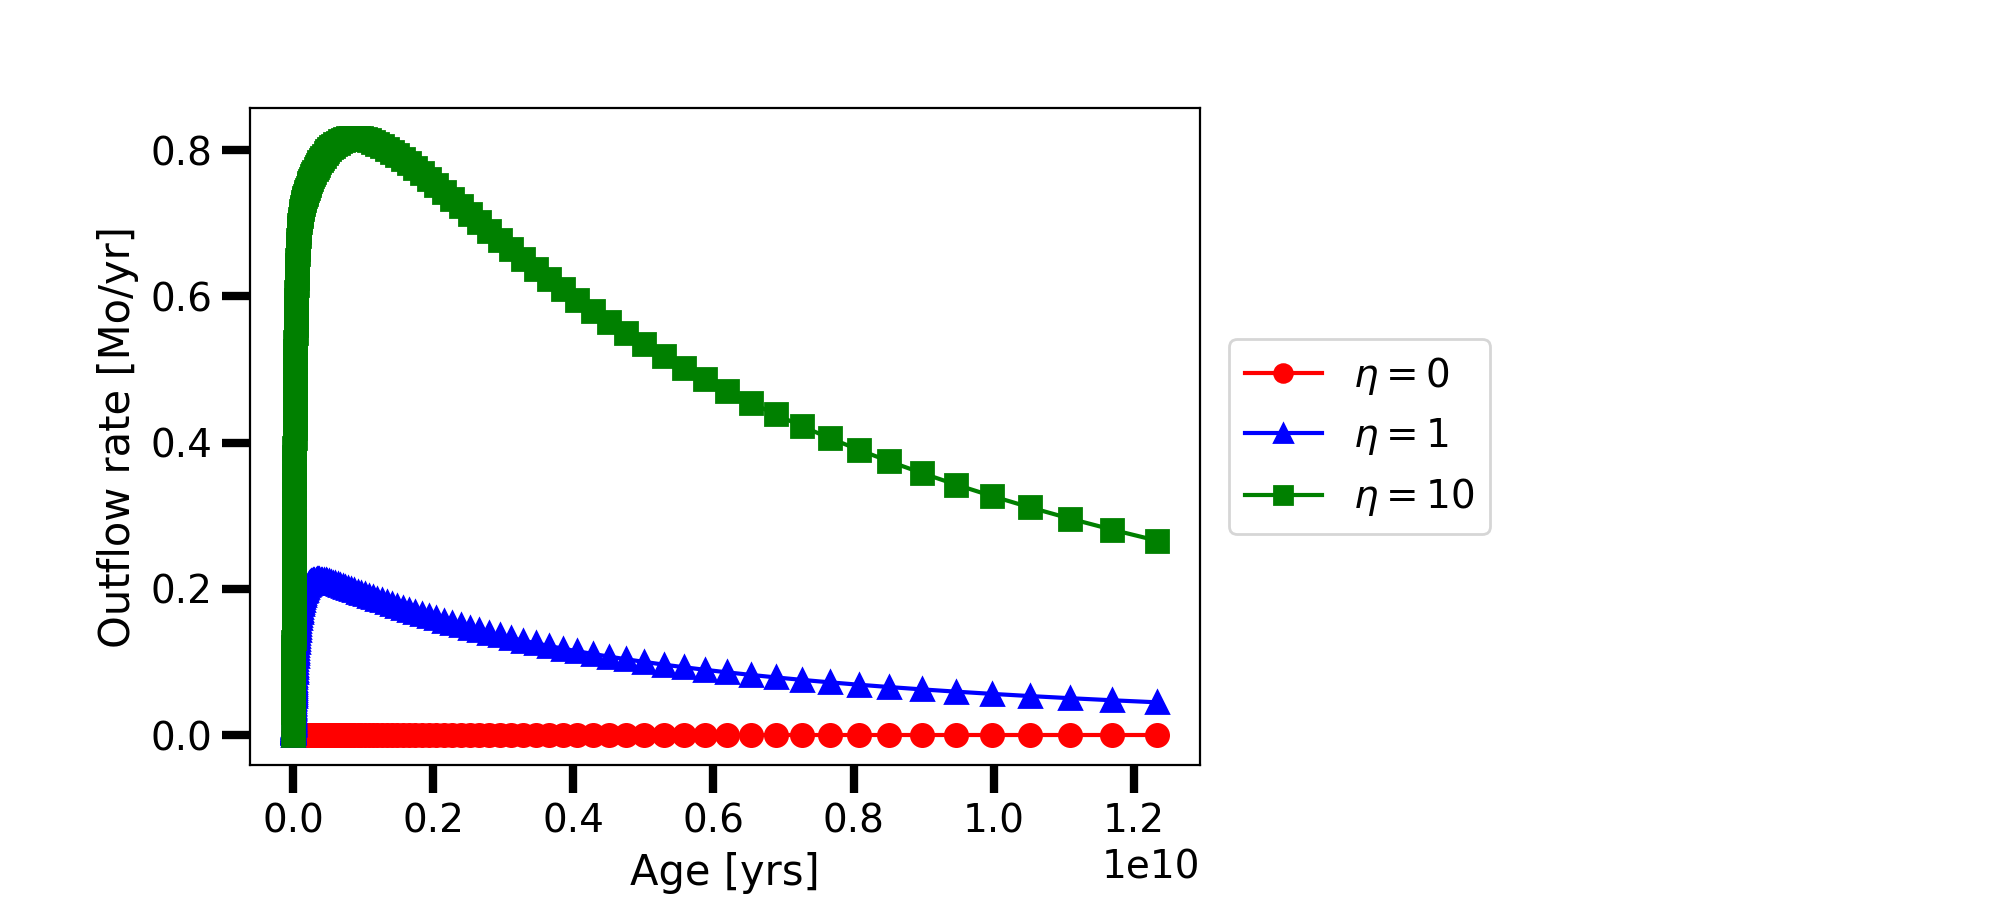

In [12]:
# Plot the outflow history
%matplotlib nbagg
op2_eta_0.inner.plot_outflow_rate( color='r', marker="o", label='$\eta=0$')
op2_eta_1.inner.plot_outflow_rate( color='b', marker="^", label='$\eta=1$')
op2_eta_10.inner.plot_outflow_rate(color='g', marker="s", label='$\eta=10$')

<IPython.core.display.Javascript object>


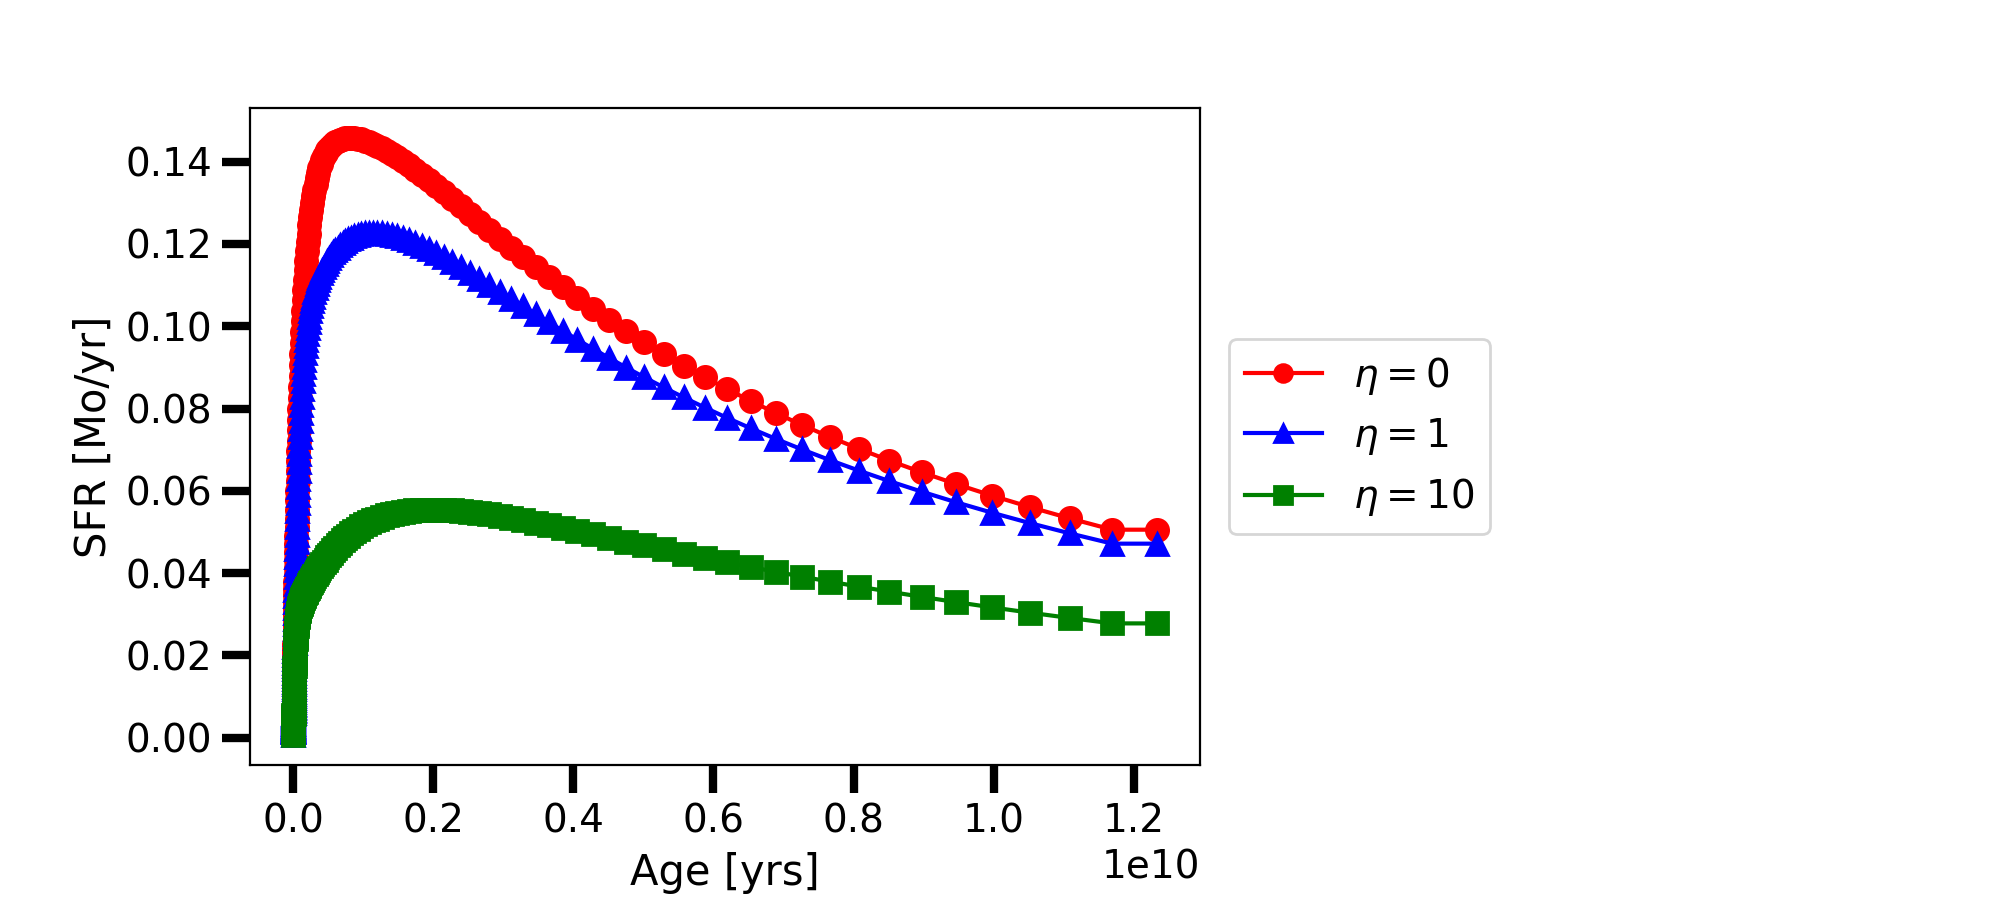

In [13]:
# Plot the star formation history
%matplotlib nbagg
op2_eta_0.inner.plot_star_formation_rate( color='r', marker="o", label='$\eta=0$')
op2_eta_1.inner.plot_star_formation_rate( color='b', marker="^", label='$\eta=1$')
op2_eta_10.inner.plot_star_formation_rate(color='g', marker="s", label='$\eta=10$')

## 3. Mass- and Redshift-Dependent Mass-Loading Factor

This option relates the mass-loading factor to the mass $M_\mathrm{DM}$ of the dark matter halo surrounding the galaxy and the redshift $z$ (see <a href="http://adsabs.harvard.edu/abs/2017ApJ...835..128C">Côté et al. 2017</a> for more details).

$$ \eta(z) = \eta_0M_\mathrm{DM}(z)^{-\gamma/3}(1+z)^{-\gamma/2} $$

- $\eta_0$: Normalization constant. It represents the value of $\eta$ at the end of the simulation.
- $\gamma$: Mass-loading power-law index used to control the correlation between the outflows and $M_\mathrm{DM}$ and $z$.

In [14]:
# Define the final redshift
redshift_f = 0.0

# Set the common arguments for the upcoming OMEGA+ runs
kwargs_3 = {"mgal":mgal, "special_timesteps":special_timesteps*2,
            "m_DM_0":m_DM_0, "sfe":sfe, "f_t_ff":2.0,
            "DM_outflow_C17":True, "DM_array":DM_array,
            "C17_eta_z_dep":True, "redshift_f":redshift_f,
            "mass_loading":10.0}

In [15]:
# Activate the mass- and redshift-dependent mass-loading factor option
# DM_outflow_C17 = True
# C17_eta_z_dep = True

# Run OMEGA+ with the same mass-loading factor normalization, but with
# different dependencies (gamma) on the the dark matter mass and redshift
op3_exp_ml_0_5 = omega_plus.omega_plus(exp_ml=0.5, **kwargs_3)
op3_exp_ml_1_0 = omega_plus.omega_plus(exp_ml=1.0, **kwargs_3)
op3_exp_ml_2_0 = omega_plus.omega_plus(exp_ml=2.0, **kwargs_3)

OMEGA+ run in progress..
OMEGA run in progress..
   OMEGA run completed - Run time: 2.98s
   OMEGA+ run completed - Run time: 2.98s
OMEGA+ run in progress..
OMEGA run in progress..
   OMEGA run completed - Run time: 2.93s
   OMEGA+ run completed - Run time: 2.93s
OMEGA+ run in progress..
OMEGA run in progress..
   OMEGA run completed - Run time: 3.04s
   OMEGA+ run completed - Run time: 3.04s


<IPython.core.display.Javascript object>


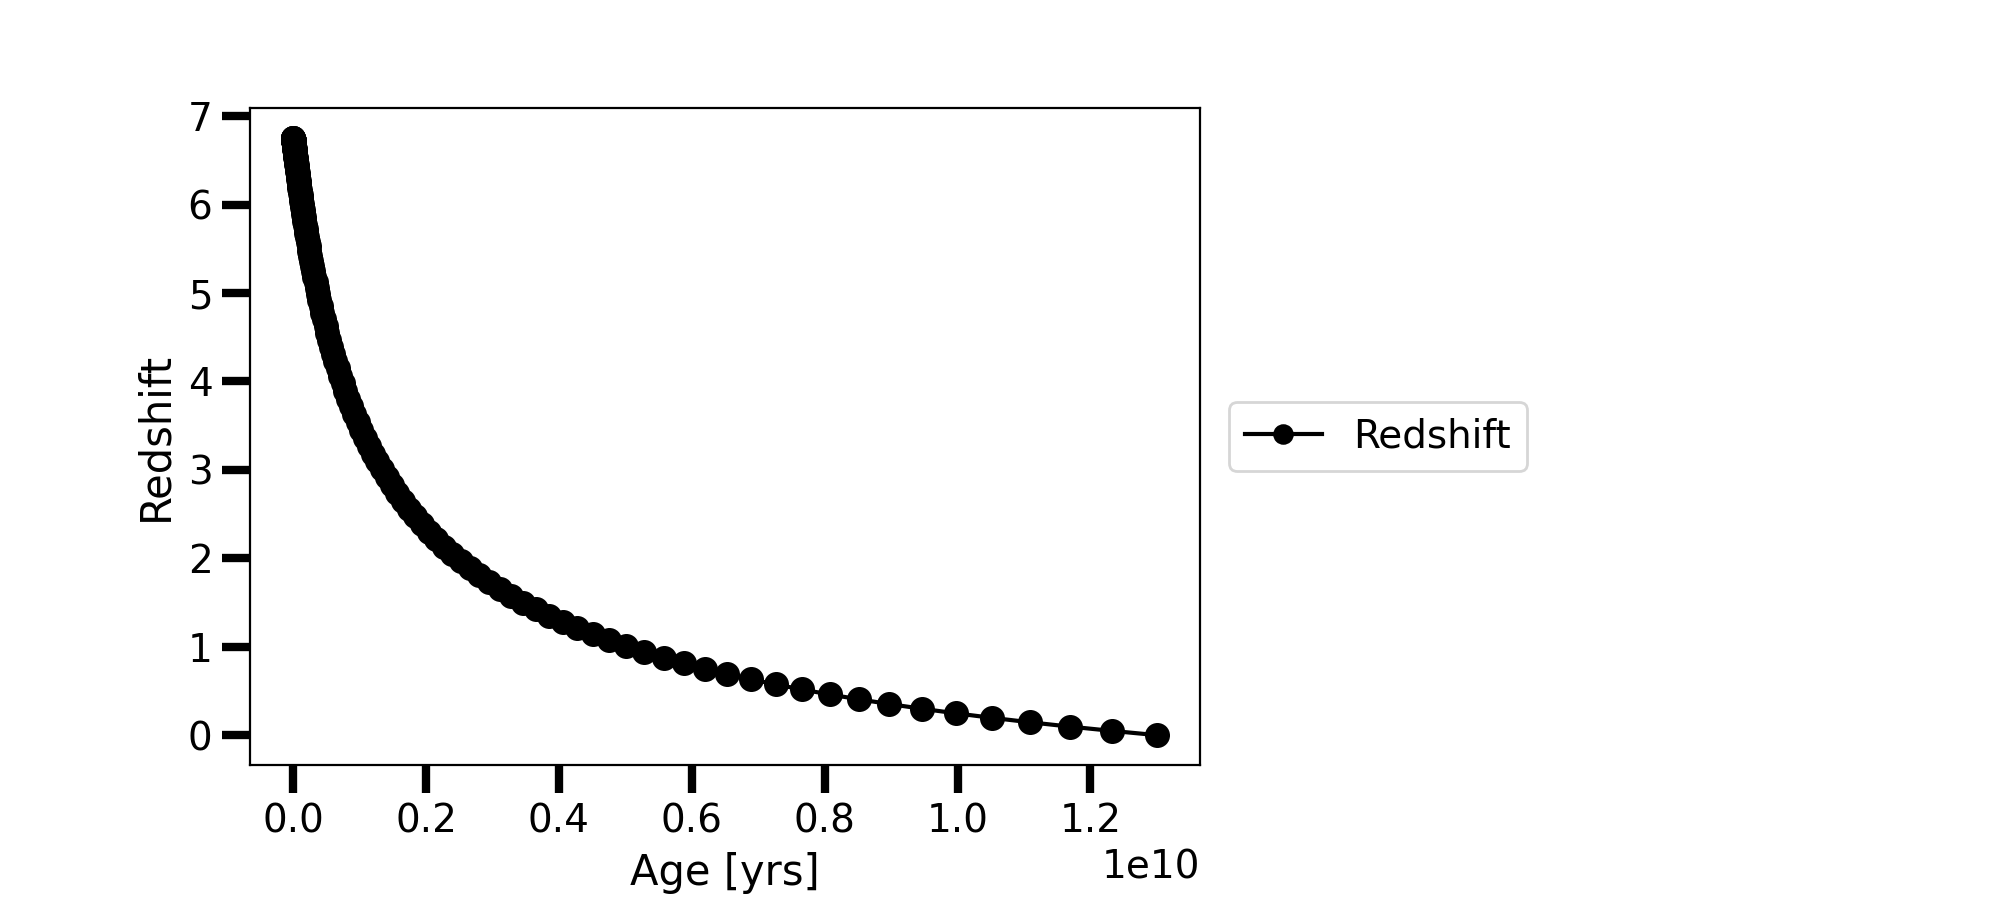

In [16]:
# Plot the relation between redshift and time
%matplotlib nbagg
op3_exp_ml_0_5.inner.plot_redshift()

<IPython.core.display.Javascript object>


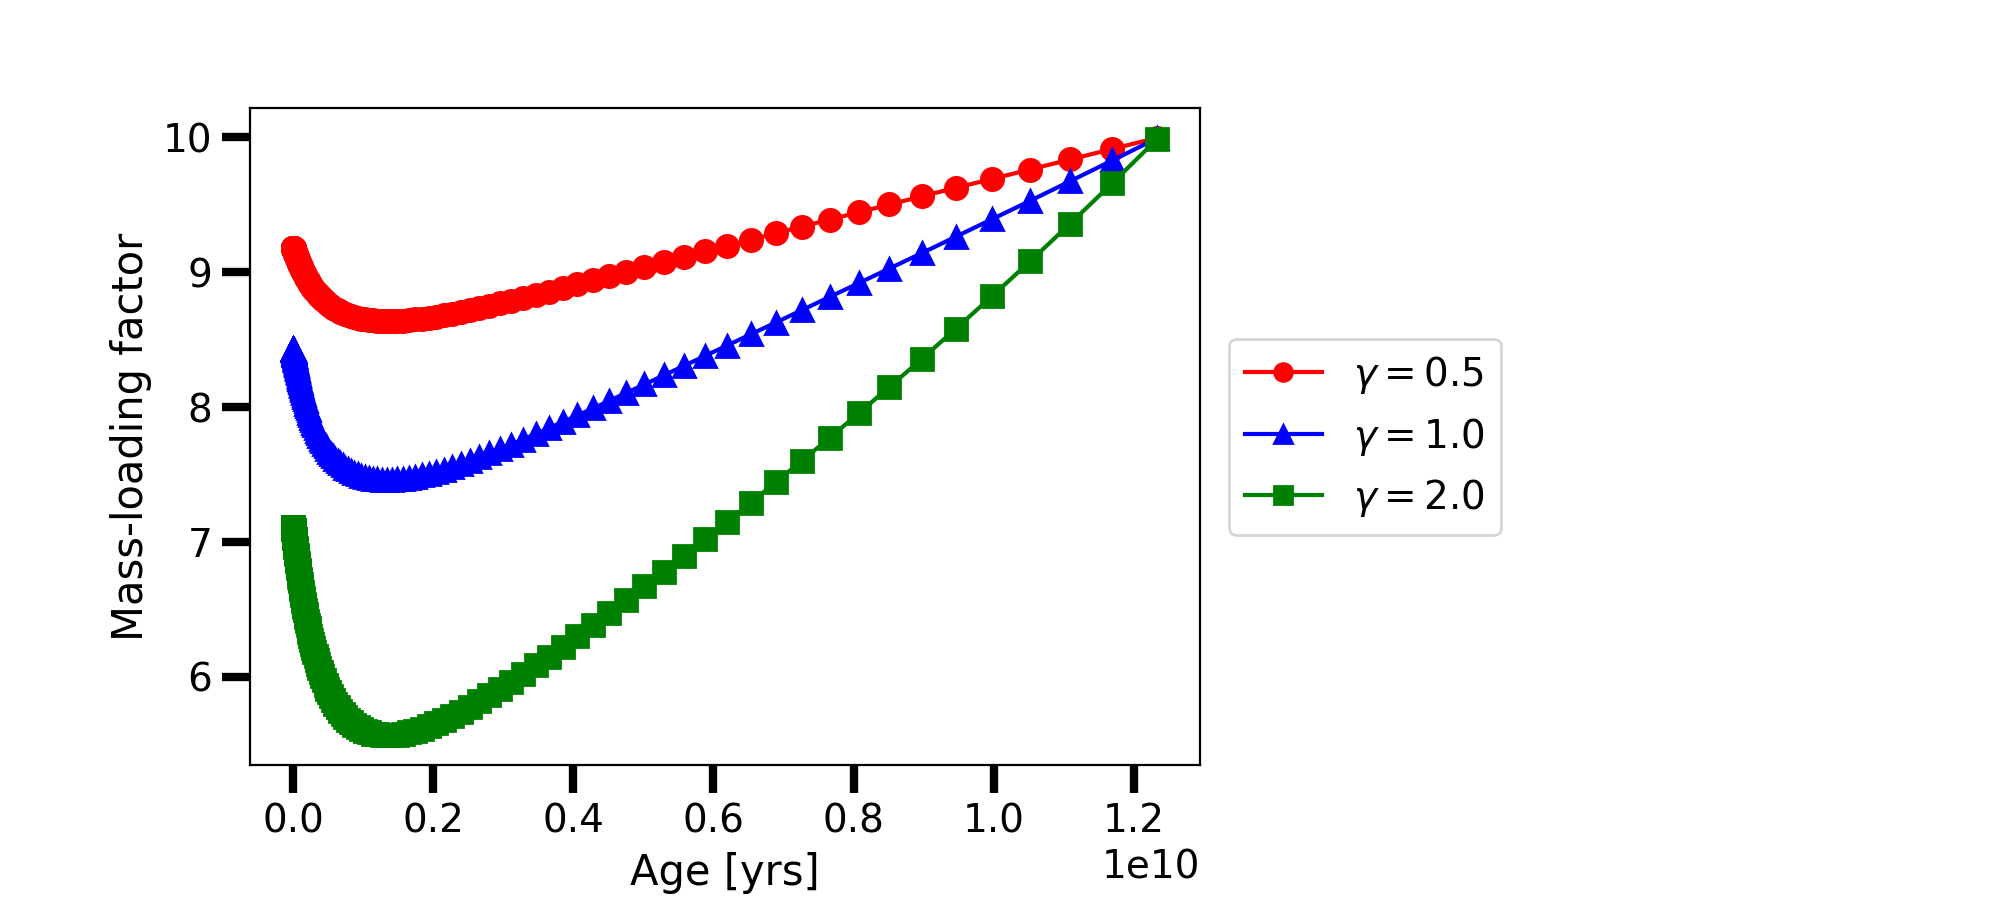

In [17]:
# Plot the mass-loading factor
%matplotlib nbagg
op3_exp_ml_0_5.inner.plot_mass_loading(color='r', marker="o", label='$\gamma=0.5$')
op3_exp_ml_1_0.inner.plot_mass_loading(color='b', marker="^", label='$\gamma=1.0$')
op3_exp_ml_2_0.inner.plot_mass_loading(color='g', marker="s", label='$\gamma=2.0$')

<IPython.core.display.Javascript object>


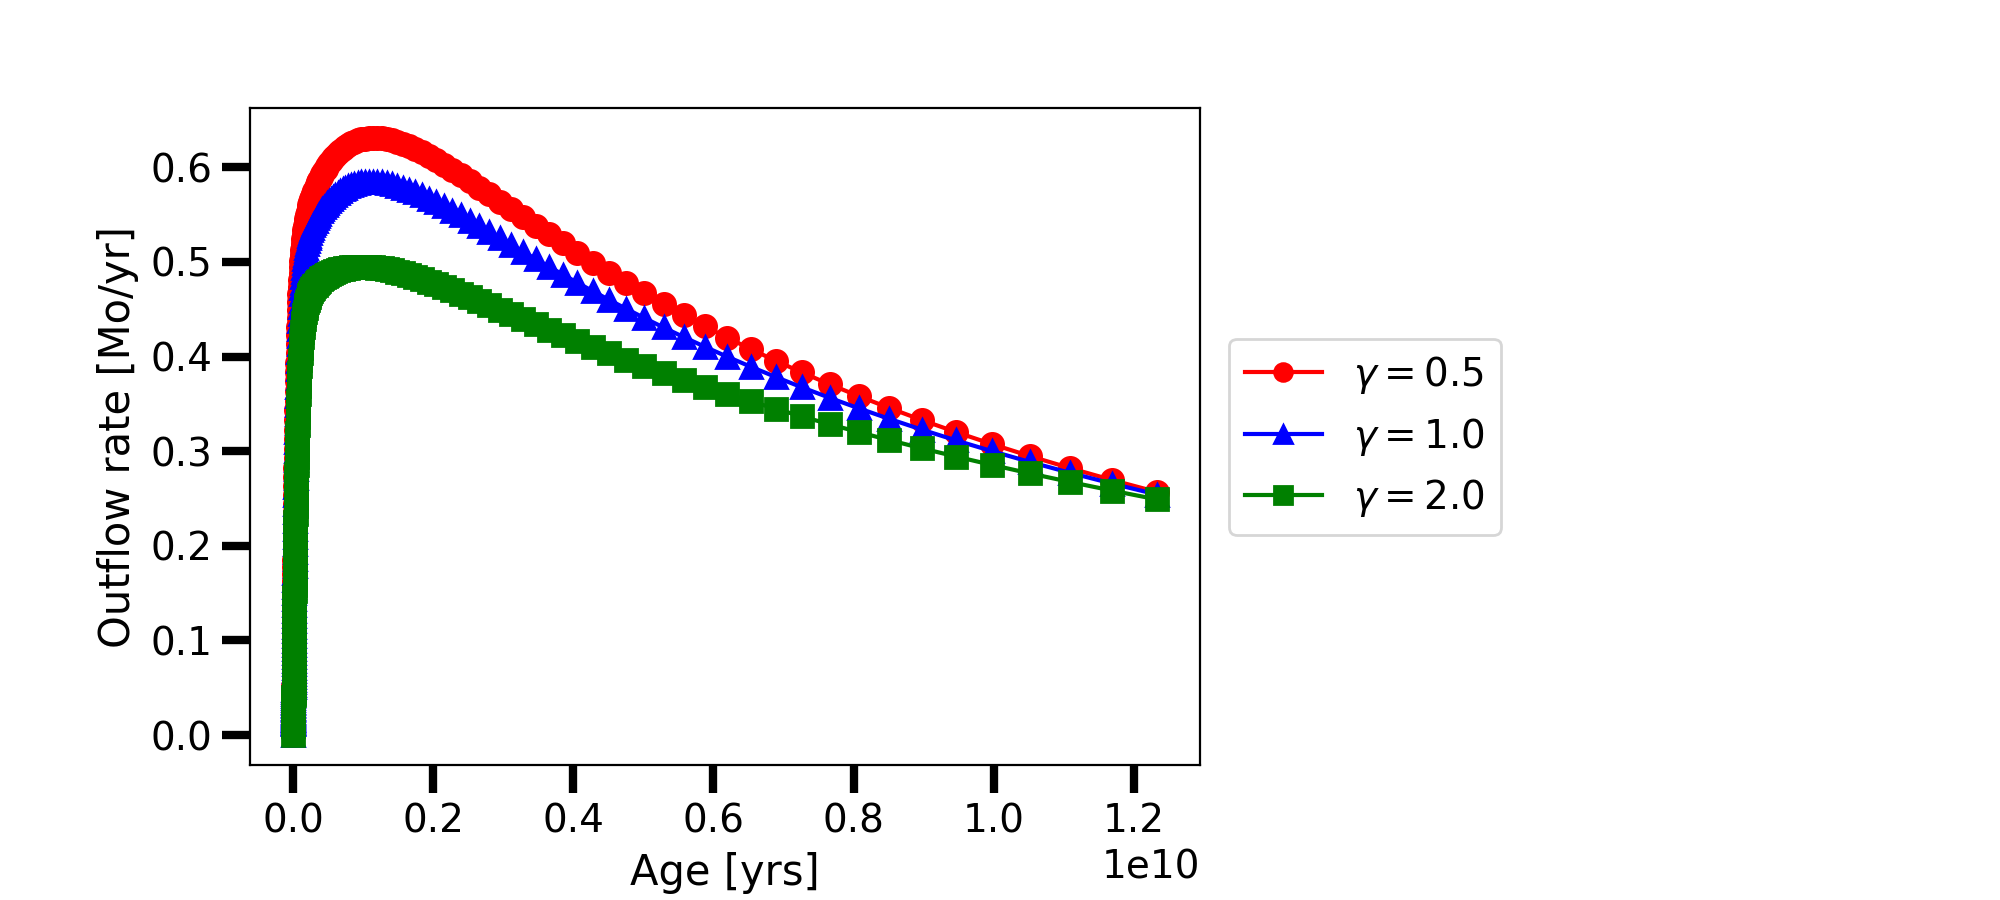

In [18]:
# Plot the outflow rate
%matplotlib nbagg
op3_exp_ml_0_5.inner.plot_outflow_rate(color='r', marker="o", label='$\gamma=0.5$')
op3_exp_ml_1_0.inner.plot_outflow_rate(color='b', marker="^", label='$\gamma=1.0$')
op3_exp_ml_2_0.inner.plot_outflow_rate(color='g', marker="s", label='$\gamma=2.0$')

<IPython.core.display.Javascript object>


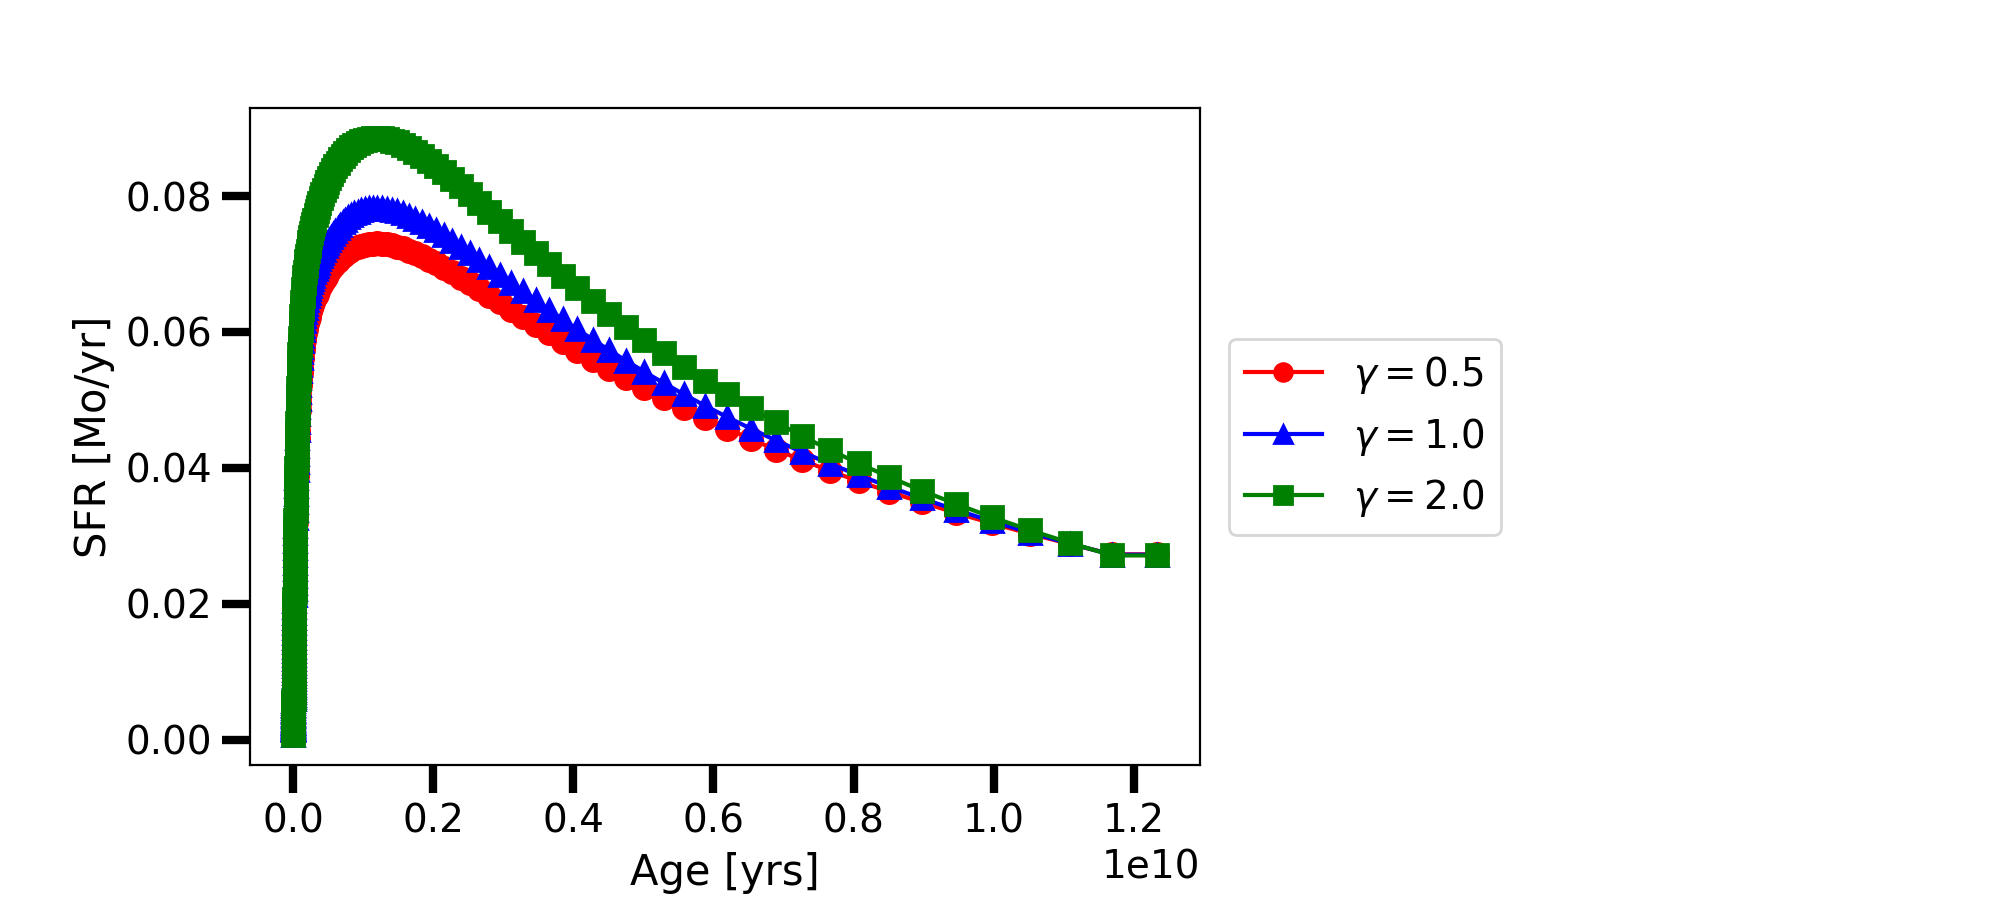

In [19]:
# Plot the star formation history
%matplotlib nbagg
op3_exp_ml_0_5.inner.plot_star_formation_rate(color='r', marker="o", label='$\gamma=0.5$')
op3_exp_ml_1_0.inner.plot_star_formation_rate(color='b', marker="^", label='$\gamma=1.0$')
op3_exp_ml_2_0.inner.plot_star_formation_rate(color='g', marker="s", label='$\gamma=2.0$')